
# non-linear Classification

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# 1000 circles

n_samples = 1000

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

X,y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label':y})

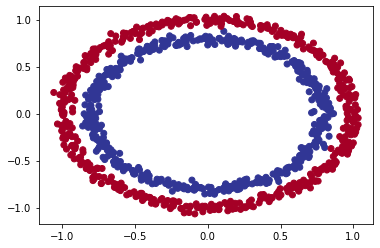

In [4]:
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

altering the activation function

In [5]:
tf.random.set_seed(42)

model_07 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_07.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics = 'accuracy')

history_07 = model_07.fit(X,y, epochs =100, verbose=0)



In [6]:
#Check the decision boundary

def plot_decision_boundary(model, X, y):
    '''
    Plots the decision boundary created by a model predicting on X
    resources   1. madewithml (github)
                2. cs231n (github)
    '''
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    # Create X value
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together
    
    #make predictions
    y_pred= model.predict(x_in)
    
    # check for multi-class
    if len(y_pred[0]) >1:
        print('doing multiclass classification')
        # reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
            
    #Plot the decision boundary
    plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40 , cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


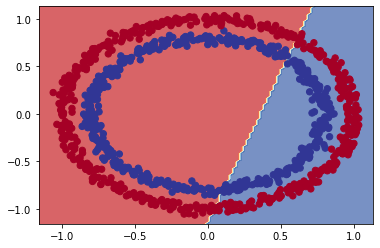

In [7]:
plot_decision_boundary(model=model_07, 
                      X=X,
                      y=y)

### Building a model with non-linear Activation function

In [8]:
# ReLu

tf.random.set_seed(42)

model_08 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_08.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics = 'accuracy')

history_08 = model_08.fit(X,y, epochs =100, verbose=0)

doing binary classification


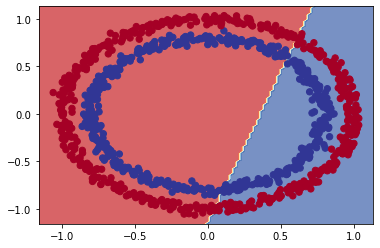

In [9]:
plot_decision_boundary(model=model_08, 
                      X=X,
                      y=y)

Multlayer model

In [10]:
tf.random.set_seed(42)

model_09 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

model_09.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics = 'accuracy')

history_09 = model_09.fit(X,y, epochs =100, verbose=0)

doing multiclass classification


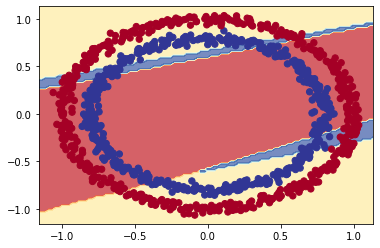

In [11]:
plot_decision_boundary(model=model_09, 
                      X=X,
                      y=y)

In [12]:
model_09.evaluate(X,y)

32/32 [==============================] - 0s 469us/step - loss: 2.4394 - accuracy: 0.4000


[2.4394116401672363, 0.4000000059604645]

In [13]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics = 'accuracy')

history_10 = model_10.fit(X,y, epochs =250, verbose=0)

doing binary classification


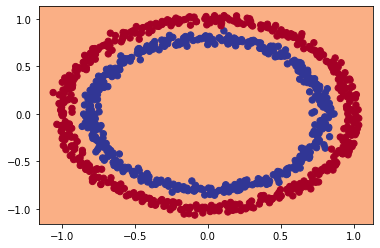

In [14]:
plot_decision_boundary(model=model_10, 
                      X=X,
                      y=y)

In [15]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics = 'accuracy')

history_11 = model_11.fit(X,y, epochs =100, verbose=0)

doing binary classification


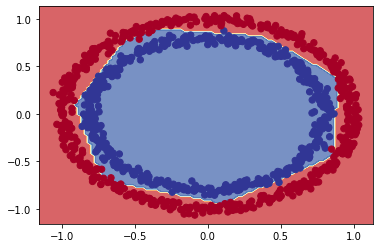

In [16]:
plot_decision_boundary(model=model_11, 
                      X=X,
                      y=y)

In [17]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_12.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics = 'accuracy')

history_12 = model_12.fit(X,y, epochs =200, verbose=0)

doing binary classification


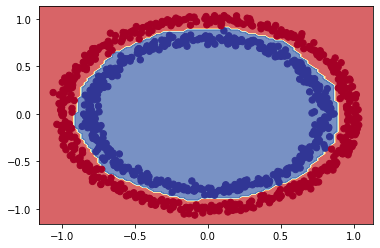

In [18]:
plot_decision_boundary(model=model_12, 
                      X=X,
                      y=y)

In [19]:
model_12.evaluate(X,y)

32/32 [==============================] - 0s 563us/step - loss: 0.0014 - accuracy: 1.0000


[0.0013577034696936607, 1.0]

In [20]:
model_11.evaluate(X,y)

32/32 [==============================] - 0s 500us/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

### Getting an intuition of Activation functions 

In [21]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

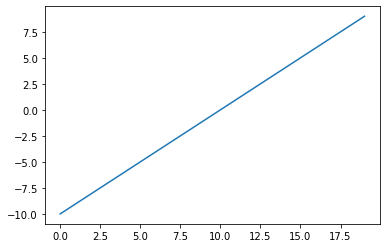

In [22]:
plt.plot(A)

In [23]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

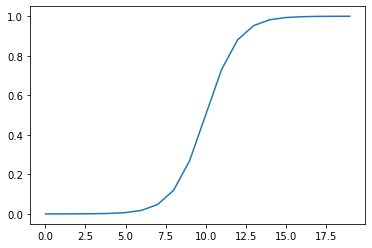

In [24]:
plt.plot(sigmoid(A))

In [25]:
def relu(x):
    return tf.maximum(0,x)

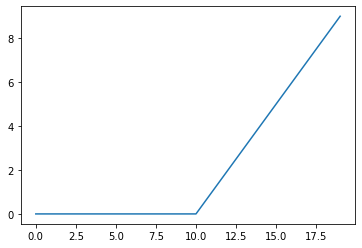

In [26]:
plt.plot(relu(A))

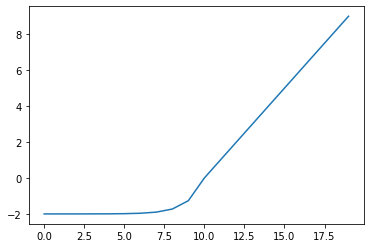

In [27]:
plt.plot(tf.keras.activations.elu(A, alpha=2))

### Evaluating and imporving the classification


Creating test and training sets

In [28]:
len(X)

1000

In [29]:
# split by indexing snce the data is not sorted

X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [30]:
X_train.shape

(800, 2)

In [31]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_12.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics='accuracy')

history_12 = model_12.fit(X_train, y_train, epochs =25, verbose=0
                         )



In [32]:
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 572us/step - loss: 0.1247 - accuracy: 1.0000


[0.12468847632408142, 1.0]

doing binary classification
doing binary classification


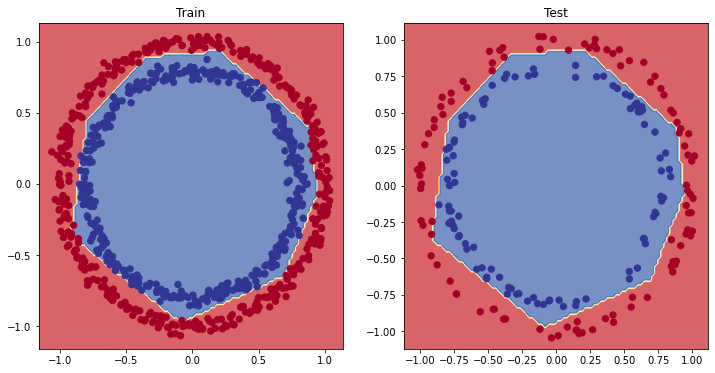

In [33]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_12, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_12, X=X_test, y=y_test)

plt.show()

In [34]:
history_12.history.keys()

dict_keys(['loss', 'accuracy'])

In [35]:
pd.DataFrame(history_12.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Loss and accuracy 0f model_12')

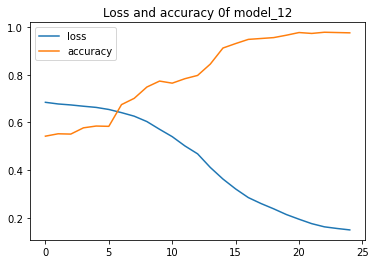

In [36]:
pd.DataFrame(history_12.history).plot()
plt.title('Loss and accuracy 0f model_12')

### Finding the best learning rate
* learning rate **callback** 
* another model
* a modified loss-curve plot

In [37]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_13.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

# Create a learning rate callbck

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


history_13 = model_13.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 560us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 560us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 520us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 560us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 560us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 560us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 520us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 600us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 560us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 560us/step - loss: 0.6871 - accura

<AxesSubplot:xlabel='epochs'>

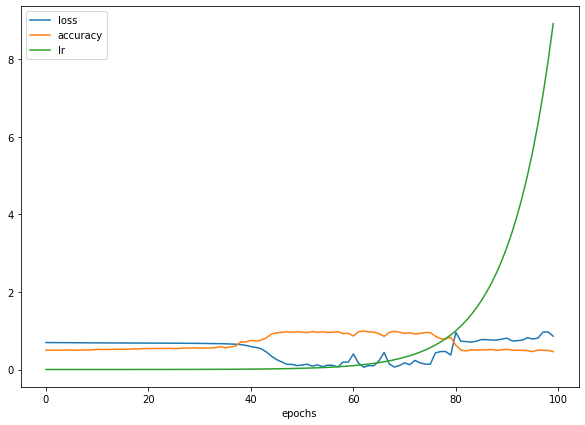

In [38]:
# checkout the history_13

pd.DataFrame(history_13.history).plot(figsize=(10,7), xlabel='epochs')


Text(0.5, 1.0, 'learning rate vs loss')

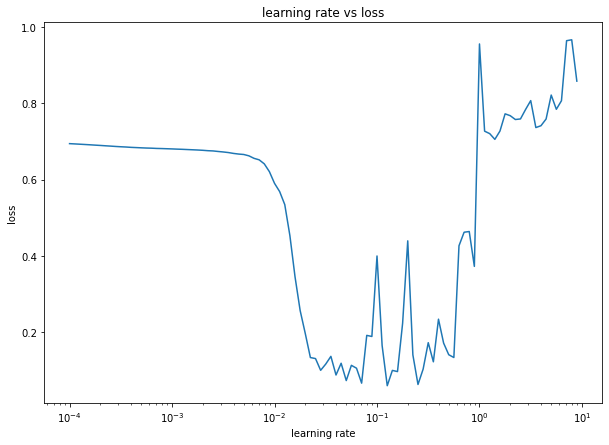

In [39]:
# plot lr vs loss

lr = 1e-4* (10**(tf.range(100)/20)) # tf.range(100) = epochs

plt.figure(figsize=(10,7))
plt.semilogx(lr, history_13.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')


picking a learning rate at around 10times higher than the learning rate of the lowest point of the loss function ( 10e-1) -> ideal lr is ~10e-2

7/7 [==============================] - 0s 572us/step - loss: 0.0574 - accuracy: 0.9900


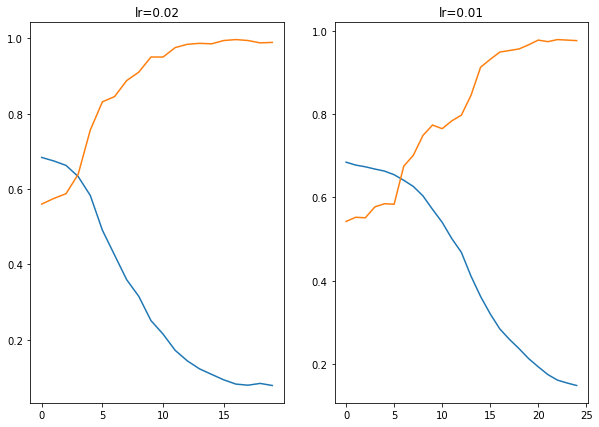

In [40]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_14.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = 'accuracy')

history_14 = model_14.fit(X_train, y_train, epochs = 20 , verbose = 0)

model_14.evaluate(X_test, y_test)


plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('lr=0.02')
plt.plot(history_14.history['loss'])
plt.plot(history_14.history['accuracy'])

plt.subplot(1,2,2)
plt.title('lr=0.01')
plt.plot(history_12.history['loss'])
plt.plot(history_12.history['accuracy'])


plt.show()

In [41]:
model_14.evaluate(X_test, y_test), model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 572us/step - loss: 0.1247 - accuracy: 1.0000


([0.05740182474255562, 0.9900000095367432], [0.12468847632408142, 1.0])

doing binary classification
doing binary classification
doing binary classification
doing binary classification


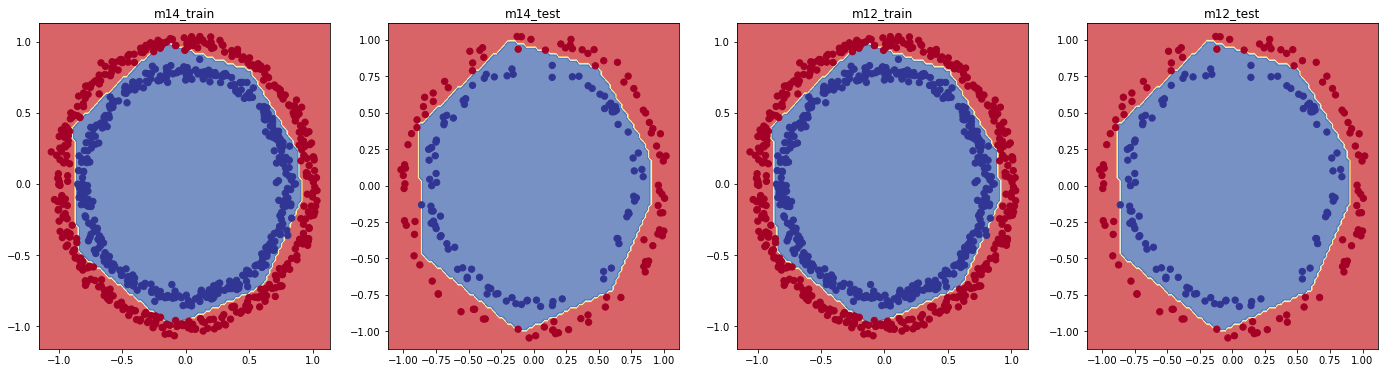

In [42]:
plt.figure(figsize=(24,6))

plt.subplot(1,4,1)
plt.title('m14_train')
plot_decision_boundary(model_14, X=X_train, y=y_train)

plt.subplot(1,4,2)
plt.title('m14_test')
plot_decision_boundary(model_14, X=X_test, y=y_test)

plt.subplot(1,4,3)
plt.title('m12_train')
plot_decision_boundary(model_14, X=X_train, y=y_train)

plt.subplot(1,4,4)
plt.title('m12_test')
plot_decision_boundary(model_14, X=X_test, y=y_test)

plt.show()

## More classification evaluation metrics
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (sklearn)

In [44]:
#Check the accuracy of our model

loss, accuracy =  model_12.evaluate(X_test, y_test)
print(f"Model loss on the test set : {loss:.4f}")
print(f"Model accuracy on the test set : {(accuracy *100):.2f}%")

7/7 [==============================] - 0s 715us/step - loss: 0.1247 - accuracy: 1.0000
Model loss on the test set : 0.1247
Model accuracy on the test set : 100.00%


In [45]:
from sklearn.metrics import confusion_matrix

In [48]:
#y_pred= model_12.predict(X_test)

#confusion_matrix(y_test, y_pred)
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [49]:
y_pred[:10]

array([[0.92475504],
       [0.98626065],
       [0.8841822 ],
       [0.90230834],
       [0.05981016],
       [0.03474832],
       [0.8333485 ],
       [0.12145856],
       [0.9885559 ],
       [0.23215416]], dtype=float32)

prediction array shows probability

In [50]:
y_pred = tf.round(y_pred)

In [55]:
y_pred = tf.squeeze(y_pred)

In [58]:
# Create confusion matrix
confusion_matrix(y_test, y_pred)

array([[101,   0],
       [  0,  99]], dtype=int64)

## Prettify the confusion matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

modify source code!

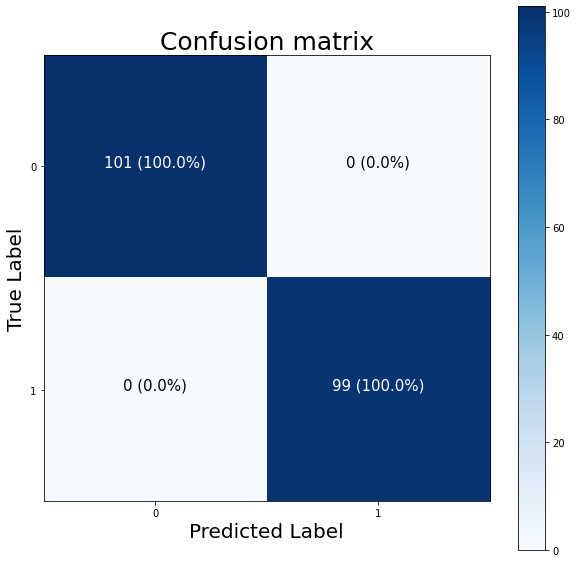

In [61]:
import itertools

figsize=(10,10)

#create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds)) # confusion_matrix from sklearn!
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] 
n_classes = cm.shape[0]

#Let's prettify
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#cerate classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

#label the axes
ax.set(title='Confusion matrix',
      xlabel='Predicted Label',
      ylabel='True Label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes))

# Set x-labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(25)

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black',
            size=15)

In [69]:
def plot_confusion_matrix(y_true, y_pred):
    
    import itertools
    from sklearn.metrics import confusion_matrix
    
    
    # reshaping y_pred
    y_pred = tf.squeeze(y_pred)
    
    figsize=(10,10)
    
    #create the confusion matrix
    cm = confusion_matrix(y_test, tf.round(y_pred)) # confusion_matrix from sklearn!
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] 
    n_classes = cm.shape[0]

    #Let's prettify
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #cerate classes
    classes = False

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #label the axes
    ax.set(title='Confusion matrix',
          xlabel='Predicted Label',
          ylabel='True Label',
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes))

    # Set x-labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(25)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min())/2.

    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i,j] > threshold else 'black',
                size=15)

In [63]:
y_pred2 = model_14.predict(X_test)

In [68]:
y_pred2.shape

(200, 1)

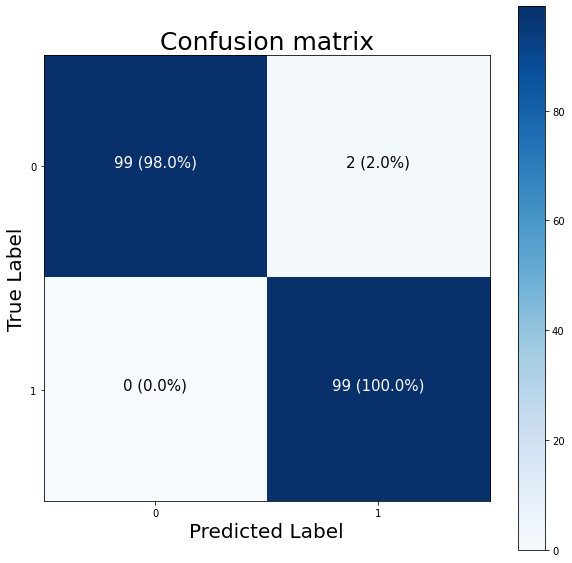

In [70]:
plot_confusion_matrix(y_test, y_pred2)